In [1]:
%pylab inline

import xarray as xr
import ocean_data_tools
from cartopy import crs, feature

sys.path.insert(0, '../regions/scripts/')

import reccap2ocean_regions as rr

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ./scripts/reccap2ocean_regions.py

In [3]:
xds = xr.open_dataset('../reccap2ocean_regions.nc')

reccap2_ocean_regions
atlantic
pacific
indian
arctic
southern


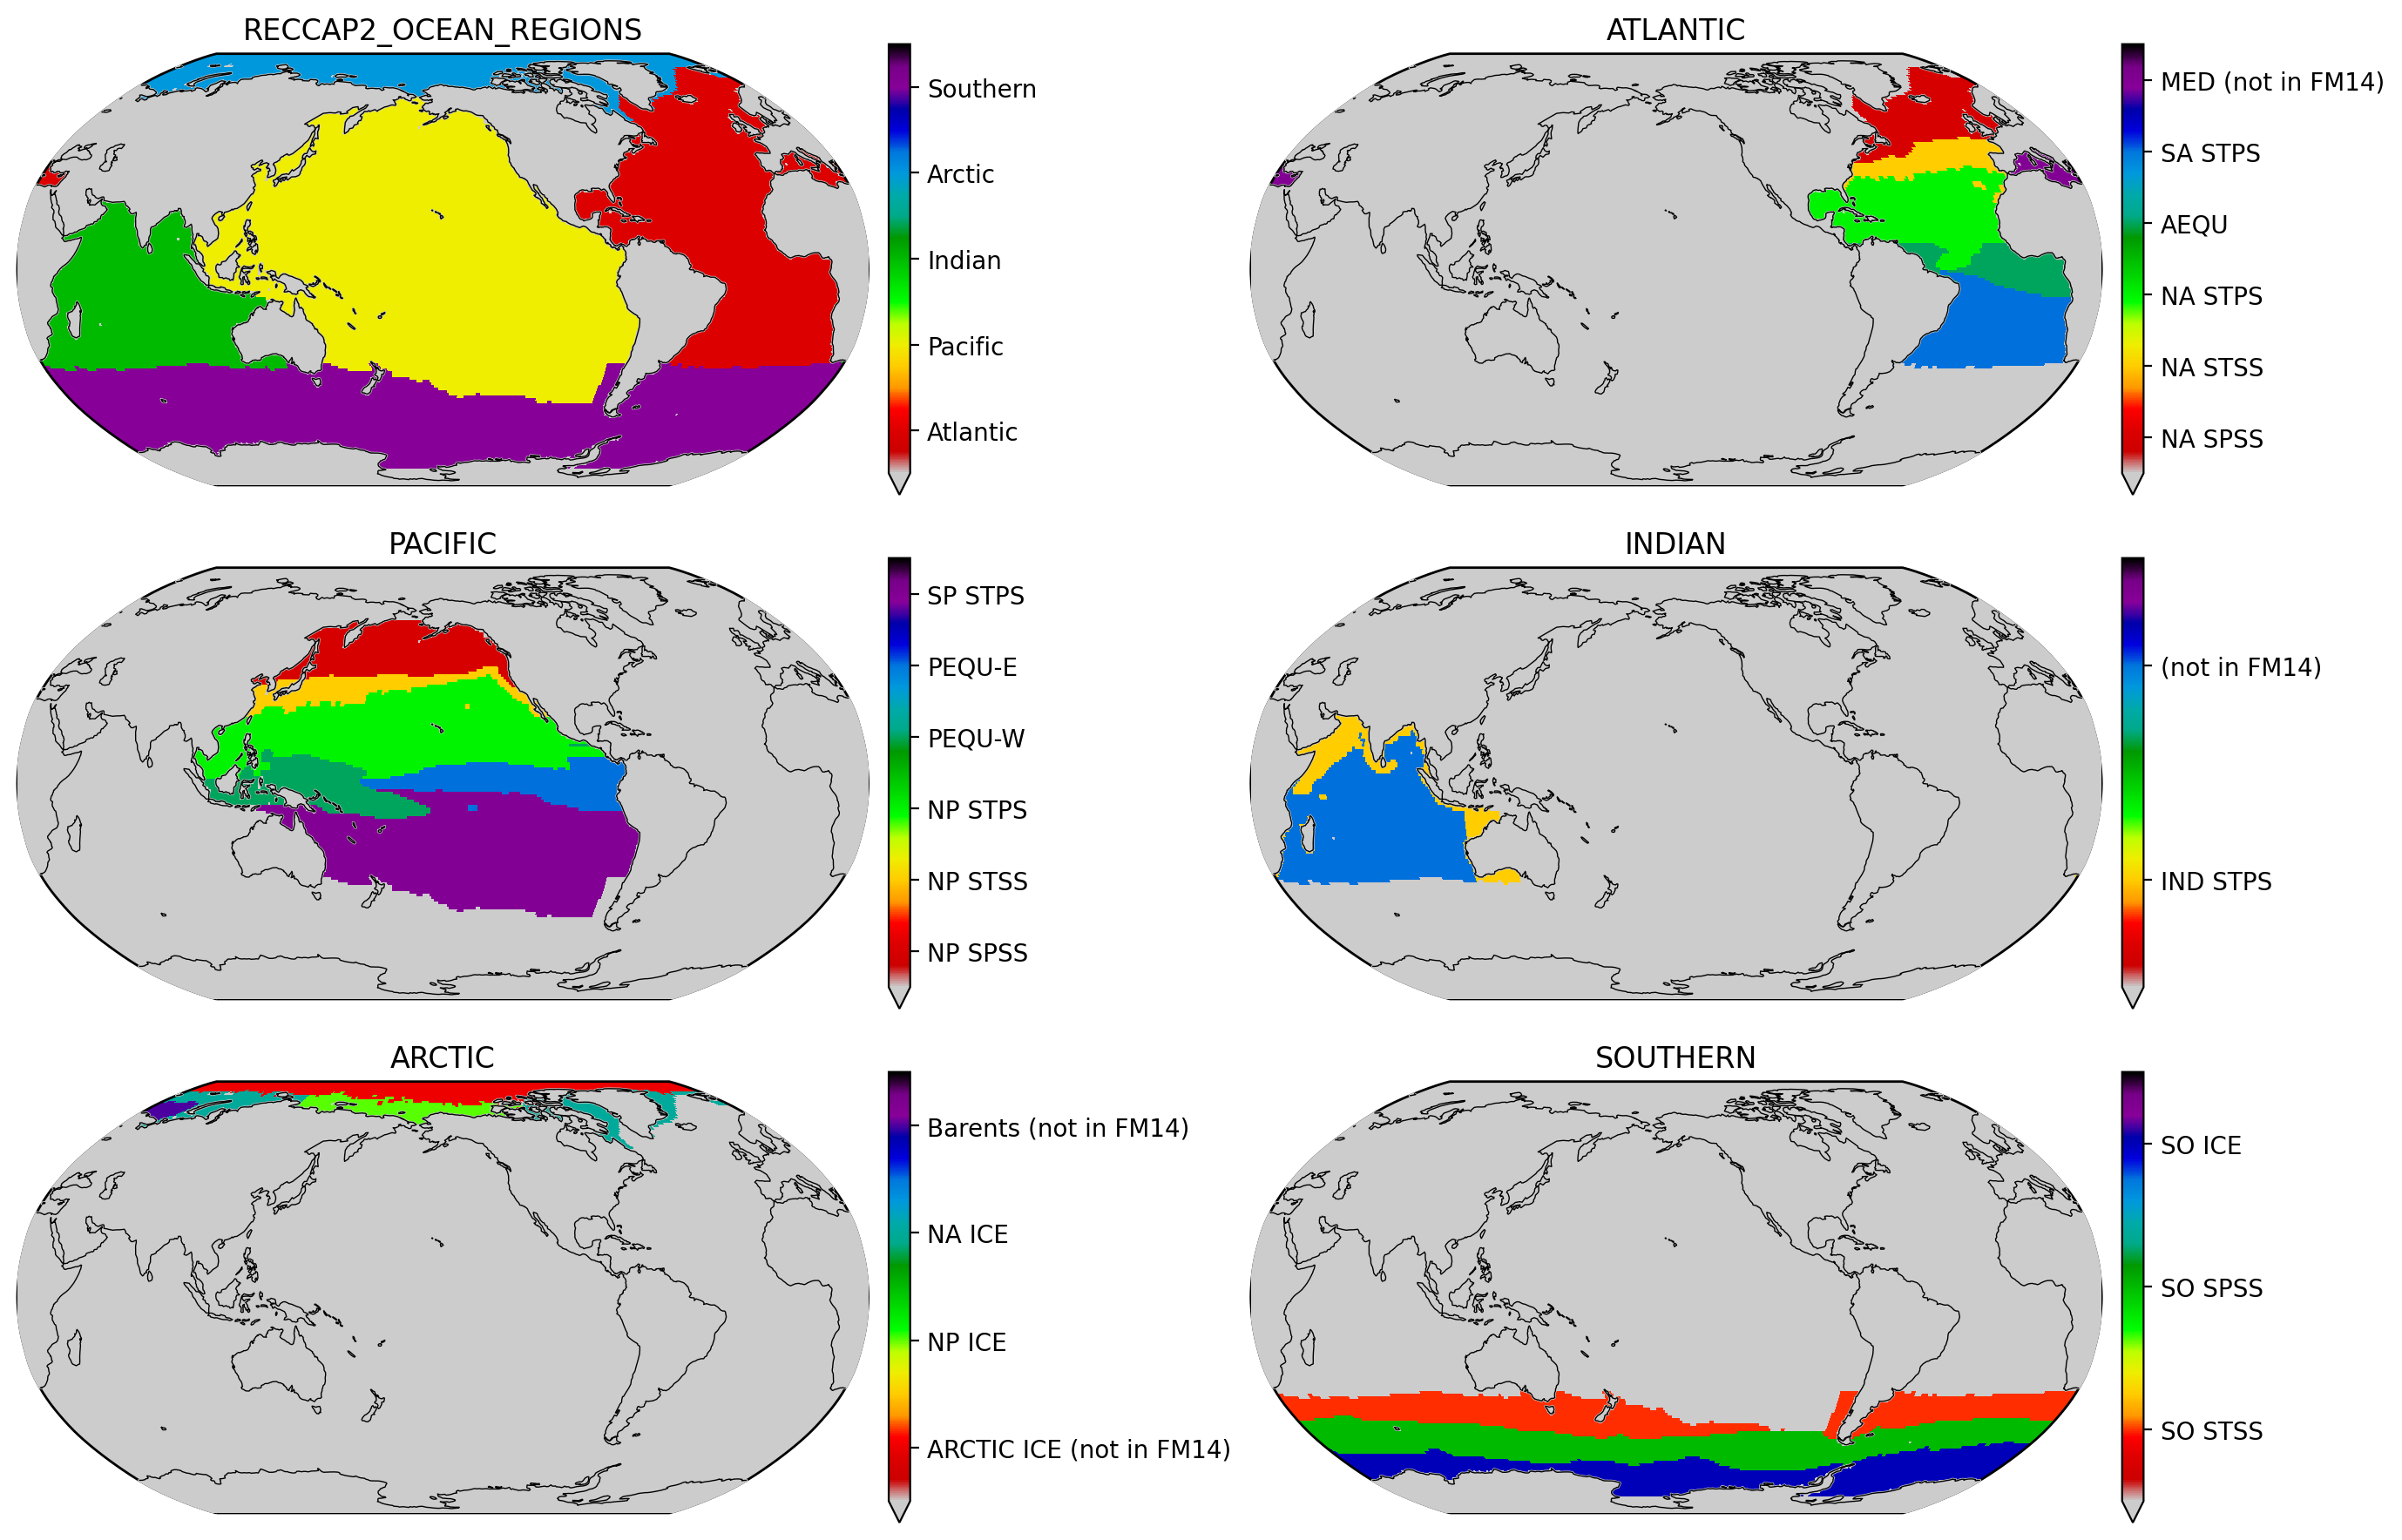

In [10]:
fig, ax = plt.subplots(3, 2, figsize=[14, 9], dpi=200, subplot_kw={"projection": crs.Robinson(-155)})
ax = ax.flatten()

regions = ["reccap2_ocean_regions", "atlantic", "pacific", "indian", "arctic", "southern",]
for i, r in enumerate(regions):
    print(r)
    names_tuple = [r.strip().split('.') for r in xds[r].region_names.split(',')]
    names = dict(names_tuple)
    
    a = xds[r].plot_map(vmin=0.5, vmax=xds[r].max() + 0.5, cmap=cm.nipy_spectral_r, ax=ax[i])
    
    a.colorbar.set_ticks(np.array(list(names.keys()), dtype=int))
    a.colorbar.set_ticklabels(list(names.values()))
    a.colorbar.set_label('')
    a.set_title(r.upper())

    
fig.tight_layout()